### Preprocessing 

In [20]:

import pandas as pd
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,f1_score,precision_score,recall_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_score,recall_score,auc




In [21]:
import warnings
warnings.filterwarnings("ignore")

#### Loading the data set

In [22]:
train_data = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
test_labels = pd.read_csv("test_values.csv")

In [23]:
train_data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [24]:
train_data.shape

(260601, 39)

In [25]:
train_data.head(1)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_data.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [27]:
train_labels.head(1)

,building_id,damage_grade
0,802906,3


In [28]:
train_labels['building_id'].equals(train_data['building_id'])

True

In [29]:
building_damage1 = train_data.merge(train_labels, how = 'inner', on = 'building_id')

In [13]:
building_damage1.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Data Preparation

In [30]:
from functools import reduce

In [31]:
building_damage1 = building_damage1.drop(columns ="has_secondary_use")

In [18]:
building_damage1.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [32]:
building_damage = building_damage1

In [16]:
building_damage['damage_grade'].value_counts()



2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [14]:
print('Training data :',building_damage.shape)
print('Test data:',test_labels.shape)

Training data : (259211, 38)
Test data: (86868, 39)


In [12]:
print('Data in Train dataset:',len(train_data))
print('Data in Test dataset:',len(test_labels))
print('Data in CV dataset:',len(train_labels))

Data in Train dataset: 260601
Data in Test dataset: 86868
Data in CV dataset: 260601


In [33]:
num_data=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq','area_percentage', 'age','height_percentage','count_families']
cat_data=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration'] 
bin_data=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
         'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [34]:
# filtering numerical data
num_train=building_damage[num_data]
num_test=test_labels[num_data]
# filtering categorical data
cat_train=building_damage[cat_data]
cat_test=building_damage[cat_data]
# filtering binary data
bin_train=building_damage[bin_data]
bin_test=test_labels[bin_data]


In [35]:
cat_feats = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position','legal_ownership_status',
       'plan_configuration']

In [57]:
building_damage['damage_grade'] = building_damage['damage_grade'].astype('int')

In [37]:
train_final = pd.get_dummies(building_damage,columns=cat_feats,drop_first=True)
test_final = pd.get_dummies(test_labels,columns=cat_feats,drop_first=True)

In [38]:
train_final['damage_grade'].dtype


CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [39]:
train_final.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade', 'land_surface_condition_o',
  

In [40]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   building_id                             86868 non-null  int64
 1   geo_level_1_id                          86868 non-null  int64
 2   geo_level_2_id                          86868 non-null  int64
 3   geo_level_3_id                          86868 non-null  int64
 4   count_floors_pre_eq                     86868 non-null  int64
 5   age                                     86868 non-null  int64
 6   area_percentage                         86868 non-null  int64
 7   height_percentage                       86868 non-null  int64
 8   has_superstructure_adobe_mud            86868 non-null  int64
 9   has_superstructure_mud_mortar_stone     86868 non-null  int64
 10  has_superstructure_stone_flag           86868 non-null  int64
 11  has_superstruct

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y_train=train_final.damage_grade
train=train_final.drop('damage_grade',axis=1)

In [19]:
X = train_final.drop('damage_grade',axis=1)
y = train_final['damage_grade']

train_final.shape

(260601, 60)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Preparation

In [25]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle
import joblib 
import random
from sklearn.metrics import accuracy_score

### Gridsearch CV

In [37]:
y_train  = list(y_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}


In [39]:
y_train

[2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,


In [41]:
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [45]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.5928523919160911


In [47]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.5915028165338981


In [48]:
predictions = logreg2.fit(X_train,y_train).predict(X_test)

In [49]:
predictions

array([2, 2, 2, ..., 1, 3, 3])

In [51]:
print(confusion_matrix(y_test,predictions))

[[ 1853  4326   140]
 [ 1316 32470  3212]
 [  123 17497  4214]]


In [55]:
print('Accuracy: ',accuracy_score(y_test,predictions))

Accuracy:  0.5915028165338981


### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

### Create a KNN model instance with n_neighbors=5

### Fit this KNN model to the training data.

In [57]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [58]:
y_train  = list(y_train)

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Predictions and Evaluation

#### Use the predict method to predict values using your KNN model and X_test.

In [60]:
pred = knn.predict(X_test)

In [61]:
sum(pred == 3)

18786

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(y_test,pred))

[[ 2213  3723   316]
 [ 1456 29880  5624]
 [  119 12407  9065]]


In [63]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.50      0.43      0.46      6319
           2       0.67      0.74      0.70     36998
           3       0.59      0.51      0.54     21834

    accuracy                           0.63     65151
   macro avg       0.58      0.56      0.57     65151
weighted avg       0.62      0.63      0.62     65151



In [64]:
print('Accuracy: ',accuracy_score(y_test,pred))


Accuracy:  0.6300287025525318


#### Choosing a K Value

#### Let's go ahead and use the elbow method to pick a good K Value!

#### ** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [65]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#### Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error Rate')

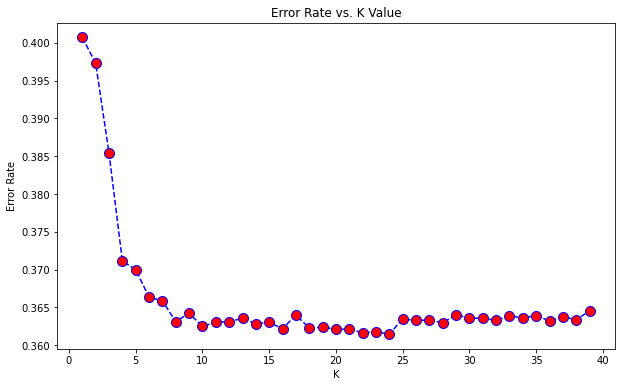

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

###  Retrain with new K Value
Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [67]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30, weights='uniform')

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[ 2296  3723   300]
 [ 1561 29930  5507]
 [  147 12449  9238]]


              precision    recall  f1-score   support

           1       0.57      0.36      0.44      6319
           2       0.65      0.81      0.72     36998
           3       0.61      0.42      0.50     21834

    accuracy                           0.64     65151
   macro avg       0.61      0.53      0.56     65151
weighted avg       0.63      0.64      0.62     65151



In [92]:
print('Accuracy: ',accuracy_score(y_test,pred))


Accuracy:  0.6364292182775398


### kNN in a GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [63]:
y_train  = list(y_train)

In [61]:
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform', 'distance'],
    'metric': ['manhattan']
}

gs=       GridSearchCV(
          KNeighborsClassifier(),
          grid_params,
          verbose =1,
           cv=3,
           n_jobs = -1)



In [65]:
X_train

array([[-1.3891018 , -0.98317386, -1.24320225, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [-1.62043234, -0.48496037,  0.0839259 , ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 0.66942421, -0.11130026, -0.95743378, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       ...,
       [-1.21444032,  0.88512671, -0.54088991, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 0.41961428, -0.360407  , -1.37882118, ..., -0.14888611,
        -0.0361696 , -0.11927599],
       [ 1.662828  , -0.360407  , -1.30616818, ..., -0.14888611,
        -0.0361696 , -0.11927599]])

In [64]:
gs_results = gs.fit(X_train[1:1000,],  y_train[1:1000])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.0s finished


In [66]:
gs_results.best_score_

0.5675675675675675

In [67]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [70]:
gs_results

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [73]:
predictions = gs_results.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.45      0.22      0.30      6252
           2       0.59      0.81      0.69     36960
           3       0.48      0.24      0.32     21591

   micro avg       0.57      0.57      0.57     64803
   macro avg       0.51      0.43      0.44     64803
weighted avg       0.54      0.57      0.53     64803



In [75]:
print(confusion_matrix(y_test,predictions))

[[ 1398  4521   333]
 [ 1455 30047  5458]
 [  231 16114  5246]]


In [69]:
print('Accuracy: ',accuracy_score(y_test,predictions))


Accuracy:  0.5915028165338981


### Training a Decision Tree Model
Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [70]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
y_train  = list(y_train)

In [73]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [74]:
predictions = dtree.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.47      0.48      0.48      6319
           2       0.70      0.69      0.70     36998
           3       0.60      0.61      0.61     21834

    accuracy                           0.64     65151
   macro avg       0.59      0.59      0.59     65151
weighted avg       0.64      0.64      0.64     65151



In [61]:
print(confusion_matrix(y_test,predictions))

[[ 3056  2728   468]
 [ 2911 25525  8524]
 [  433  8008 13150]]


[[ 3053  2814   452]
 [ 2962 25536  8500]
 [  423  8059 13352]]


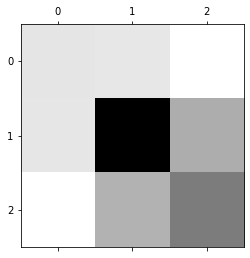

In [77]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.matshow(cm, cmap='binary')

In [78]:
print('Accuracy: ',accuracy_score(y_test,predictions))


Accuracy:  0.6437506715169375


### Training the Random Forest model
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
RF = RandomForestClassifier()
def RF_param_selection(X, y, nfolds):
   trees = [50,55,60,65,70,75,80,85,90,95,100]
   param_grid = {'n_estimators': trees}
   grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
   grid_search.fit(X, y)
   grid_search.best_params_
   return grid_search.best_params_

In [23]:
RF_param_selection(X_train,y_train, 5)

NameError: name 'GridSearchCV' is not defined

In [25]:
rfc = RandomForestClassifier(n_estimators=95)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=95)

In [27]:
predictions = rfc.predict(X_test)

Text(0.5, 0, 'Feature Importance')

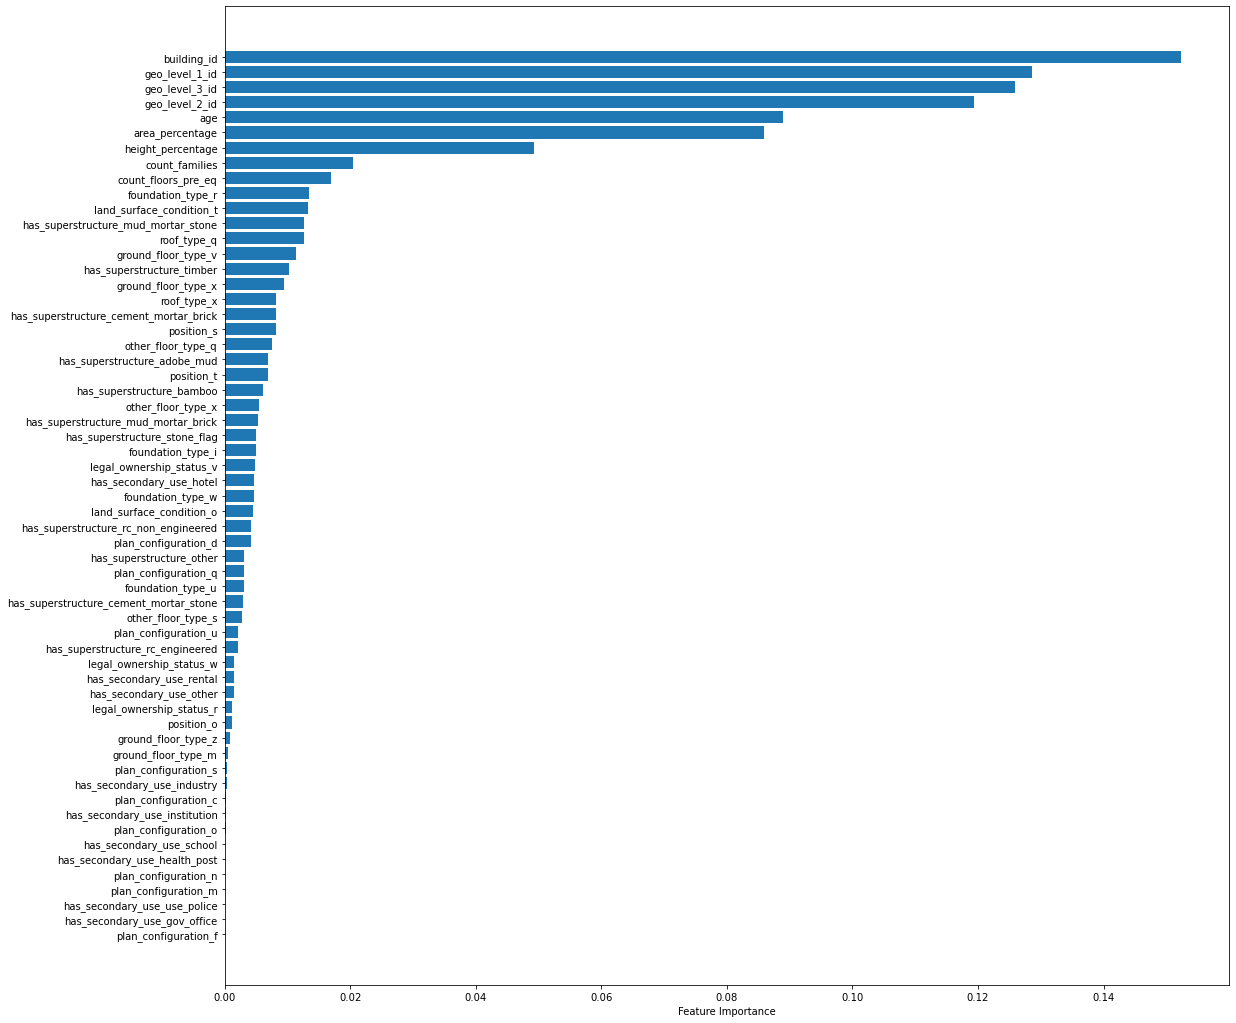

In [28]:
plt.figure(figsize=(18,18))
sort = rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sort], rfc.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [71]:
predictions

array([1, 2, 1, ..., 2, 3, 2])

# Geo_level_1_id

In [85]:
test_final['geo_level_1_id'].value_counts()

6     8104
17    7452
26    7387
10    7320
7     6571
8     6385
20    5545
21    5055
4     4894
27    4254
13    3238
11    2675
3     2455
22    2106
25    1865
16    1392
0     1347
9     1255
18    1011
12    1010
30     909
5      889
1      887
15     814
14     605
24     427
23     377
2      290
29     141
19     124
28      84
Name: geo_level_1_id, dtype: int64

In [84]:
damage1 = {}
damage2 = {}
damage3 = {}
for i,j in (train_final['geo_level_1_id'].value_counts()).iteritems():
    n1 = len(train_final[train_final['damage_grade']==1][train_final['geo_level_1_id']==i])
    n2 = len(train_final[train_final['damage_grade']==2][train_final['geo_level_1_id']==i])
    n3 = len(train_final[train_final['damage_grade']==3][train_final['geo_level_1_id']==i])
    
    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
list1 = []
list2 = []
list3 = []
for i in train_final['geo_level_1_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))
train_final['prob1_geo1'] = list1
train_final['prob2_geo1'] = list2
train_final['prob3_geo1'] = list3

# Geo_level_2_id

In [71]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (train_final['geo_level_2_id'].value_counts()).iteritems():
    
    n1 = len(train_final[train_final['damage_grade']==1][train_final['geo_level_2_id']==i])
    n2 = len(train_final[train_final['damage_grade']==2][train_final['geo_level_2_id']==i])
    n3 = len(train_final[train_final['damage_grade']==3][train_final['geo_level_2_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
    
list1 = []
list2 = []
list3 = []

for i in train_final['geo_level_2_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

train_final['prob1_geo2'] = list1
train_final['prob2_geo2'] = list2
train_final['prob3_geo2'] = list3

# Geo_level_3_id

In [73]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (train_final['geo_level_3_id'].value_counts()).iteritems():
    
    n1 = len(train_final[train_final['damage_grade']==1][train_final['geo_level_3_id']==i])
    n2 = len(train_final[train_final['damage_grade']==2][train_final['geo_level_3_id']==i])
    n3 = len(train_final[train_final['damage_grade']==3][train_final['geo_level_3_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j
    
list1 = []
list2 = []
list3 = []

for i in train_final['geo_level_3_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

train_final['prob1_geo3'] = list1
train_final['prob2_geo3'] = list2
train_final['prob3_geo3'] = list3

In [51]:
train_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 70 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   has_superstructure_adobe_mud            260601 non-null  int64   
 9   has_superstructure_mud_mortar_stone     260601 non-null  int64   
 10  has_superstructure_stone_flag   

In [75]:
X = train_final.drop('damage_grade',axis=1)
train_final['damage_grade'].astype('int')
y = train_final['damage_grade']


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

In [78]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'{model} f1 score:')
score = f1_score(y_test, y_pred, average='micro')
print(f'{score:.4f}')
print('\n')

RandomForestClassifier() f1 score:
0.7472




In [79]:

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'{model} f1 score:')
score = f1_score(y_test, y_pred, average='micro')
print(f'{score:.4f}')
print('\n')

GradientBoostingClassifier() f1 score:
0.7600


